In [1]:
include("prac1.jl")

valdiff (generic function with 3 methods)

In [2]:
a = Dual{Int}(1, 2)

Dual{Int64}(1, 2)

In [3]:
Base. abs(a::Vector{T}) where T = begin
    sum = 0
    for i in range(1, length(a))
        sum += a[i]^2
    end
    return sqrt(sum)
end

In [4]:
cos_newthon_dual(x::Dual) = begin
    a = cos(x) - x
    return -(real(a)/imag(a))
end

cos_newthon_dual (generic function with 1 method)

In [5]:
cos_newthon_analytic(x) = begin
    #(cos(x) - x)' = -sin(x) - 1
    return ((-cos(x) + x)/(-sin(x) - 1))
end

cos_newthon_analytic (generic function with 1 method)

In [6]:
diff_aprox(f::Function, x) = begin
    h = 1e-8
    return (f(x+h) - f(x))/h
end

diff_aprox (generic function with 1 method)

In [7]:
cos_newthon_approx(x) = begin
    return -((cos(x) - x)/(diff_aprox(x->(cos(x)-x), x)))
end

cos_newthon_approx (generic function with 1 method)

In [8]:
newthon(r::Function, x; epsilon=1e-8, num_max = 10) = begin
    dx = r(x)
    x += dx
    k = 1
    while abs(dx) > epsilon && k < num_max
        dx = r(x)
        x += dx
        k += 1
    end
    abs(dx) > epsilon && @warn("Требуемая точность не достигнута")
    return x
end

newthon (generic function with 1 method)

In [9]:
real(newthon(x -> cos_newthon_dual(x), Dual{AbstractFloat}(0, 1)))

0.7390851332151607

In [10]:
newthon(x -> cos_newthon_analytic(x), 0)

0.7390851332151607

In [11]:
newthon(x -> cos_newthon_approx(x), 0)

0.7390851332151607

In [12]:
p1 = Polynomial{Complex{AbstractFloat}}([2, 2, 3])

2.0 + 0.0imx^2 + 2.0 + 0.0imx^1 + 3.0 + 0.0im

In [13]:
valdiff(p1, 2)[1]

15.0 + 0.0im

In [14]:
p_newthon_dual(p::Polynomial, x::Dual) = begin
    a = p(x)
    return -(real(a)/imag(a))
end

p_newthon_dual (generic function with 1 method)

In [15]:
root_dual(p::Polynomial{Complex{T}}, start_value::Complex{T}, tool::AbstractFloat) where T = begin
    start_value_d = Dual{Complex{AbstractFloat}}(start_value, 1)
    return real(newthon(start_value_d -> p_newthon_dual(p, start_value_d), start_value_d, epsilon=tool))
end

root_dual (generic function with 1 method)

In [16]:
root_dual(p1, Complex{AbstractFloat}(-2, sqrt(2)), 1e-8)

-0.5 + 1.118033988749895im

In [17]:
p_newthon(p::Polynomial, x) = begin
    a = valdiff(p, x)
    return -(a[1]/a[2])
end

p_newthon (generic function with 1 method)

In [18]:
root(p::Polynomial{Complex{T}}, start_value::Complex{T}, tool::AbstractFloat) where T = begin
    return newthon(start_value -> p_newthon(p, start_value), start_value, epsilon=tool)
end

root (generic function with 1 method)

In [19]:
root(p1, Complex{AbstractFloat}(-2, sqrt(2)), 1e-8)

-0.5 + 1.118033988749895im

In [20]:
yakobi_analytic(x1) = begin
    return [[2*x1[1], 3*x1[2]*x1[1]^2] [2*x1[2], x1[1]^3]]
end

yakobi_analytic (generic function with 1 method)

In [21]:
f1(x) = begin
    return x[1]^2 + x[2]^2 - 1
end
f2(x) = begin
    return  x[2]*(x[1]^3) - 1
end

f2 (generic function with 1 method)

In [22]:
yakobi_dual(f1::Function, f2::Function, x1) = begin
    a11 = imag(f1([Dual{AbstractFloat}(x1[1], 1), Float16(x1[2])]))
    a12 = imag(f1([Float16(x1[1]), Dual{AbstractFloat}(x1[2], 1)]))
    a21 = imag(f2([Dual{AbstractFloat}(x1[1], 1), Float16(x1[2])]))
    a22 = imag(f2([Float16(x1[1]), Dual{AbstractFloat}(x1[2], 1)]))
    return [[a11, a21] [a12, a22]]
end

yakobi_dual (generic function with 1 method)

In [23]:
f_yakobi_analytic(x1) = begin
    return -yakobi_analytic(x1)\[x1[1]^2 + x1[2]^2 - 1, x1[2]*x1[1]^3 - 1]
end

f_yakobi_analytic (generic function with 1 method)

In [24]:
f_yakobi_dual(x1) = begin
    return -yakobi_dual(x1 -> f1(x1), x1 -> f2(x1), x1)\[f1(x1), f2(x1)]
end

f_yakobi_dual (generic function with 1 method)

In [25]:
x1 = [1, 1]
newthon(x1 -> f_yakobi_analytic(x1), x1)

┌ Warning: Требуемая точность не достигнута
└ @ Main e:\univer\2 sem\julia\prac2\prac2.ipynb:10


2-element Vector{Float64}:
 1.0346051111354382
 0.6184545929206268

In [26]:
newthon(x1 -> f_yakobi_dual(x1), x1)

┌ Warning: Требуемая точность не достигнута
└ @ Main e:\univer\2 sem\julia\prac2\prac2.ipynb:10


2-element Vector{Float64}:
 1.0234608697773298
 0.6261969910341056

In [27]:
f_yakobi_analytic_inv(x1) = begin
    return -inv(yakobi_analytic(x1))*[x1[1]^2 + x1[2]^2 - 1, x1[2]*x1[1]^3 - 1]
end

f_yakobi_analytic_inv (generic function with 1 method)

In [28]:
f_yakobi_dual_inv(x1) = begin
    return -inv(yakobi_dual(x1 -> f1(x1), x1 -> f2(x1), x1))*[f1(x1), f2(x1)]
end

f_yakobi_dual_inv (generic function with 1 method)

In [29]:
x1 = [1, 1]
newthon(x1 -> f_yakobi_analytic_inv(x1), x1)

┌ Warning: Требуемая точность не достигнута
└ @ Main e:\univer\2 sem\julia\prac2\prac2.ipynb:10


2-element Vector{Float64}:
 1.0346051111354295
 0.618454592920632

In [30]:
newthon(x1 -> f_yakobi_dual_inv(x1), x1)

┌ Warning: Требуемая точность не достигнута
└ @ Main e:\univer\2 sem\julia\prac2\prac2.ipynb:10


2-element Vector{Float64}:
 1.0234608697773298
 0.6261969910341058

In [31]:
log_b1(a1, a2, a, x, ϵ) = begin
    z = x
    t = 1.0
    y = 0.0

    while z < a1 || z > a2 || t > ϵ
        if z < a1
            z *= a
            y -= t
        
        elseif z > a2
            z /= a
            y += t

        elseif t > ϵ
            t /= 2
            z *= z
        end
    end
    
    return y
end

log_b1 (generic function with 1 method)

In [32]:
log_m1(a1, a2, a, x, ϵ) = begin
    z = x
    t = 1.0
    y = 0.0

    while z < a1 || z > a2 || t > ϵ
        if z > a2
            z *= a
            y -= t
        
        elseif z < a1
            z /= a
            y += t

        elseif t > ϵ
            t /= 2
            z *= z
        end
    end
    
    return y
end

log_m1 (generic function with 1 method)

In [33]:
any_log(a, x) = begin
    if a > 1
        a1 = 1/a
        a2 = a

        return log_b1(a1, a2, a, x, 10e-8)
    else
        a1 = a
        a2 = 1/a

        return log_m1(a1, a2, a, x, 10e-8)
    end
end

any_log (generic function with 1 method)

In [34]:
any_log(2, 8)

2.9999999403953552

In [35]:
any_log(0.5, 2)

-0.9999999403953552

In [36]:
cos_teylor(x, n) = begin
    cosinus = 0
    a = 1
    for k in range(1, n+1)
        cosinus += a
        a = (-a * x^2)/(2*k)/(2*k-1)
    end
    return cosinus
end

cos_teylor (generic function with 1 method)

In [37]:
cos_teylor(π, 10)

-0.9999999999243493

In [38]:
cos_teylor_eps(x, ϵ) = begin
    cosinus = 0
    a = 1
    k = 1
    while abs(a) > ϵ
        cosinus += a
        a = (-a * x^2)/(2*k)/(2*k-1)
        k += 1
    end
    return cosinus
end

cos_teylor_eps (generic function with 1 method)

In [39]:
cos_teylor_eps(π, 10e-8)

-1.0000000035290801

In [40]:
e_teylor(x, ϵ) = begin
    e = 0
    a = 1
    k = 1
    while abs(a) > ϵ
        e += a
        a = (a * x)/k
        k += 1
    end
    return e
end

e_teylor (generic function with 1 method)

In [41]:
e_teylor(-2, 10e-8)

0.13533530549403575

In [42]:
e_fix(x, ϵ) = begin
    if x > 0
        return e_teylor(x, ϵ)
    end
    return 1/e_teylor(-x, ϵ)
end

e_fix (generic function with 1 method)

In [43]:
e_fix(-2, 10e-8)

0.13533528376052678

In [44]:
J_a(x, a, ϵ) = begin
    j = 0
    a_fact = factorial(a)
    b = x^a / a_fact / 2^a
    k = 1

    while abs(b) > ϵ
        j += b
        b = -b * x^2 / 4 / k / (a + k)
        k += 1
    end

    return j
end

J_a (generic function with 1 method)

In [45]:
using Plots

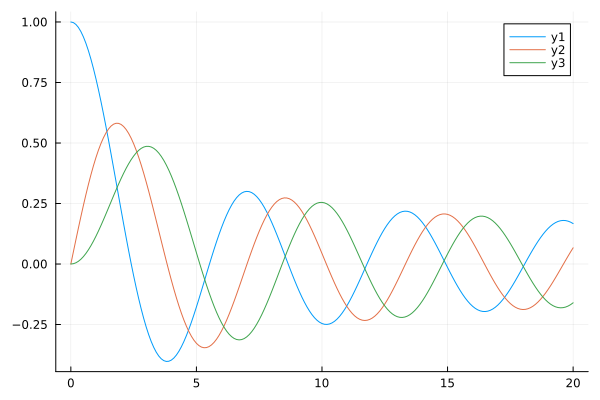

In [46]:
xx = 0:0.1:20
yy = J_a.(xx, 0, 10e-10)

p = plot(xx, yy)
yy = J_a.(xx, 1, 10e-10)
plot!(p, xx, yy)
yy = J_a.(xx, 2, 10e-10)
plot!(p, xx, yy)

In [47]:
x1 = 2
newthon(x1 -> J_a(x1, 0, 10e-10), x1)

┌ Warning: Требуемая точность не достигнута
└ @ Main e:\univer\2 sem\julia\prac2\prac2.ipynb:10


2.4045942105002136

In [48]:
J_a(2.4045942105002136, 0, 10e-10)

0.0001201093001934896